# Jayithi-Data Visualization Techniques in Python

PS-I RESEARCHED ABOUT MANY DATA VISUALIZATION TECHNIQUES BUT FOUND THESE FIVE ON THE INTERNET. I WANTED TO INCLUDE TECHNIQUES THAT WERE NOT VERY POPULAR.

**Data visualization is a powerful tool for understanding and interpreting complex data sets. This document introduces five unique data visualization techniques, highlighting their use cases and providing code examples.**

In [37]:
#I am importing all the libraries at once here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from matplotlib import patches
from matplotlib.patches import Ellipse
from matplotlib.tri import Triangulation


## 1. Andrew Curves

- **Andrew Curves Tutorial**: [Andrew Curves on Wikipedia](https://en.wikipedia.org/wiki/Andrew_curves)
- **Matplotlib Parallel Coordinates Plot**: [Pandas Documentation - Parallel Coordinates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html)

### Introduction
Andrew Curves are a method to visualize high-dimensional data by projecting it onto a 2D space. Each data point is represented as a curve, making it easier to identify patterns and clusters in multidimensional data.

### How It Is Used
Andrew Curves are particularly useful for exploring datasets with many features. They allow for visual comparison of data points and can reveal underlying structures in high-dimensional spaces.

### Code Example

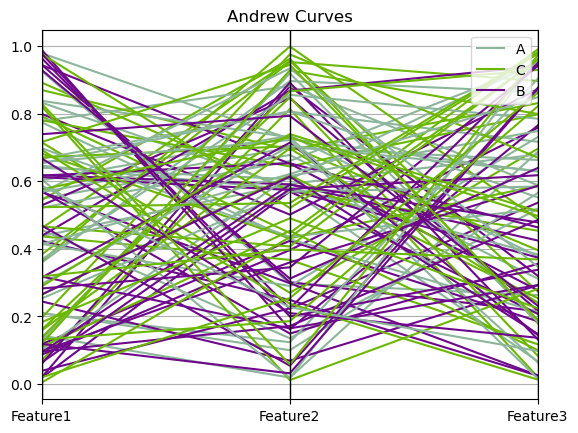

In [38]:
# I set a random seed to ensure that the sample data I generate is reproducible.
np.random.seed(0)

# I created a DataFrame with 100 rows and 4 columns: three features and one class column.
# 'Feature1', 'Feature2', and 'Feature3' contain random floating-point numbers between 0 and 1.
# 'Class' contains random choices from the categories 'A', 'B', and 'C'.
df = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Class': np.random.choice(['A', 'B', 'C'], 100)
})

# I used the parallel_coordinates function to create a plot of Andrew Curves.
# The 'Class' column is used to differentiate between the curves for each class.
parallel_coordinates(df, 'Class')

# I added a title to the plot for better understanding.
plt.title('Andrew Curves')

# I displayed the plot so I can visualize the Andrew Curves.
plt.show()


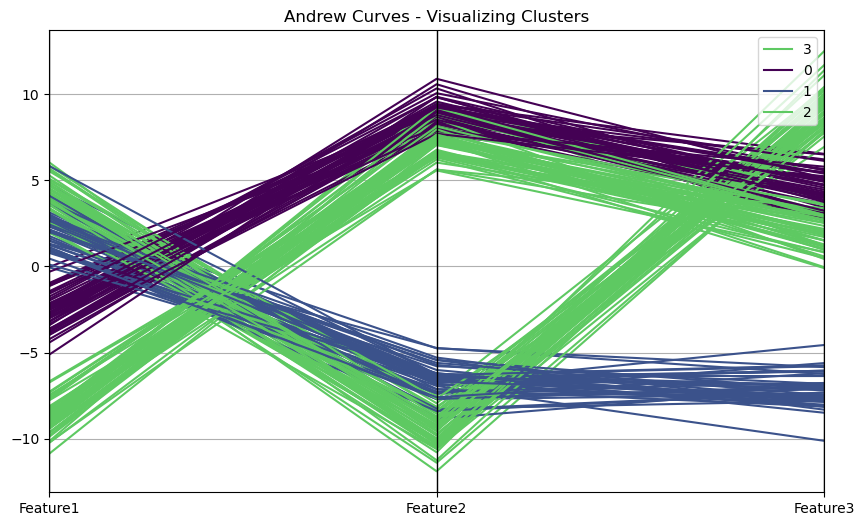

In [39]:
# I generated sample data with clusters using make_blobs. 
# The data includes 200 samples, 3 features, and 4 centers (clusters). 
# I used a random state of 42 to ensure reproducibility.
X, y = make_blobs(n_samples=200, n_features=3, centers=4, random_state=42)

# I created a DataFrame from the generated data with columns 'Feature1', 'Feature2', and 'Feature3' 
# for the features, and added a 'Class' column for the cluster labels.
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Class'] = y

# I created a figure with a specified size for better visualization.
plt.figure(figsize=(10, 6))

# I used the parallel_coordinates function to plot Andrew Curves for the clusters.
# I applied a color map (viridis) to distinguish between different clusters in the plot.
parallel_coordinates(df, 'Class', color=plt.cm.viridis(df['Class'] / 4))

# I added a title to the plot to indicate that it visualizes clusters.
plt.title('Andrew Curves - Visualizing Clusters')

# I displayed the plot to visualize the Andrew Curves.
plt.show()


## 2. Parallel Coordinates

- **Introduction to Parallel Coordinates**: [Parallel Coordinates - Wikipedia](https://en.wikipedia.org/wiki/Parallel_coordinates_(data_visualization))
- **Matplotlib Parallel Coordinates Plot**: [Pandas Documentation - Parallel Coordinates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html)
- **Interactive Parallel Coordinates with Plotly**: [Plotly Parallel Coordinates](https://plotly.com/python/parallel-coordinates/)

### Introduction
Parallel Coordinates is a technique to visualize high-dimensional data by plotting each dimension as a vertical axis. Each line represents a data point, connecting its values across different dimensions.

### How It Is Used
This method helps in understanding relationships between multiple variables and in identifying clusters or patterns in high-dimensional datasets.

### Code Example

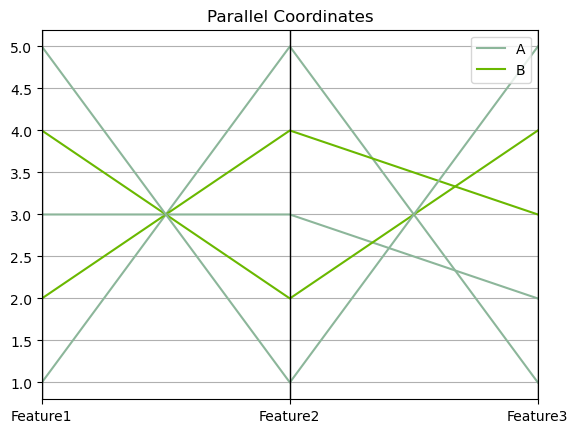

In [40]:
# I created a sample dataset with fixed values for demonstration.
# The dataset includes three features ('Feature1', 'Feature2', 'Feature3') and a class label ('Class').
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 3, 2, 4, 5],
    'Class': ['A', 'B', 'A', 'B', 'A']
}

# I converted the dictionary into a DataFrame for easier manipulation and plotting.
df = pd.DataFrame(data)

# I used the parallel_coordinates function to plot parallel coordinates.
# This will show how the features compare across the different classes.
parallel_coordinates(df, 'Class')

# I added a title to the plot to describe what it represents.
plt.title('Parallel Coordinates')

# I displayed the plot to visualize the parallel coordinates.
plt.show()


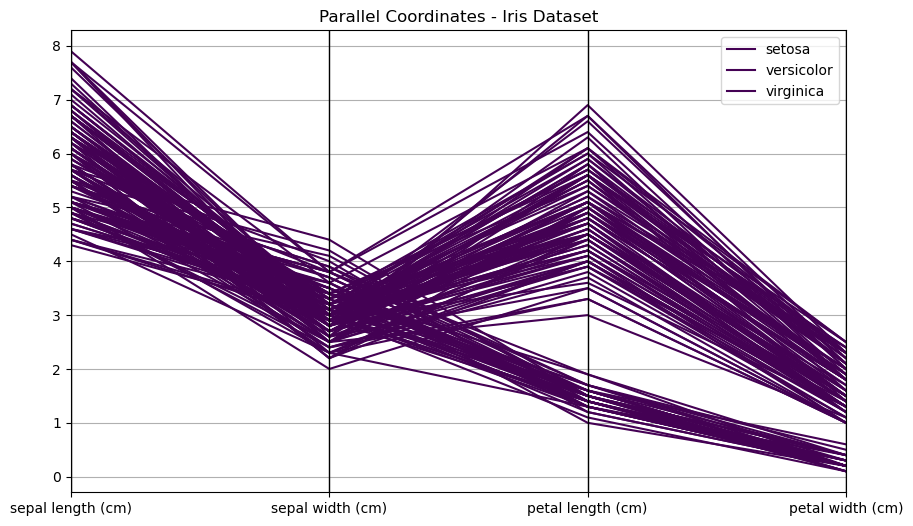

In [41]:
# I loaded the Iris dataset using the load_iris function.
# This dataset contains measurements for iris flowers and their species.
iris = load_iris()

# I created a DataFrame from the loaded data.
# The DataFrame includes feature columns with names from the Iris dataset and a 'species' column with species names.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# I created a figure with a specified size for better visualization.
plt.figure(figsize=(10, 6))

# I used the parallel_coordinates function to plot parallel coordinates for the Iris dataset.
# I applied a color map (viridis) to distinguish between the species, converting species names to category codes.
parallel_coordinates(df, 'species', color=plt.cm.viridis(df['species'].astype('category').cat.codes / 2))

# I added a title to the plot to indicate that it represents the Iris dataset.
plt.title('Parallel Coordinates - Iris Dataset')

# I displayed the plot to visualize the parallel coordinates.
plt.show()

## 3. Chernoff Faces

- **Chernoff Faces Overview**: [Chernoff Faces - Wikipedia](https://en.wikipedia.org/wiki/Chernoff_faces)
- **Matplotlib Chernoff Faces Tutorial**: [Chernoff Faces in Python - Towards Data Science](https://towardsdatascience.com/chernaff-faces-the-ultimate-visualization-of-multivariate-data-in-python-5cdb87cf0c3e)

### Introduction
Chernoff Faces use facial features to represent multivariate data. Each facial characteristic, such as the shape of the eyes or the curvature of the mouth, encodes a different data dimension.

### How It Is Used
Chernoff Faces are used to visualize complex data by translating numerical values into facial features. This technique can make it easier to perceive patterns in high-dimensional data.

### Code Example

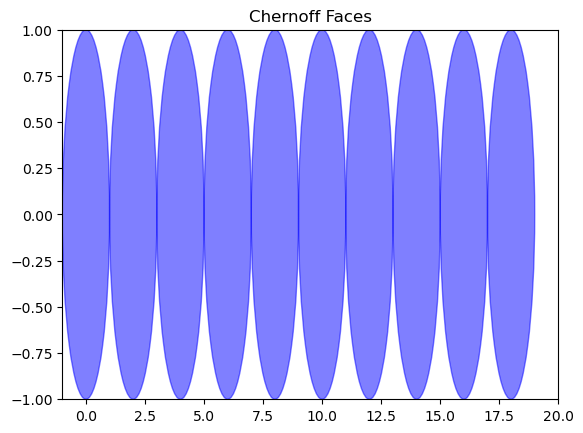

In [42]:
# I generated some sample data with 10 data points, each having 6 dimensions.
data = np.random.rand(10, 6)  # 10 data points with 6 dimensions

# I defined a function to create Chernoff Faces.
# This function will plot faces as circles to represent each data point.
def chernoff_faces(data):
    # I created a figure and axis for plotting.
    fig, ax = plt.subplots()
    
    # I iterated over each data point in the dataset.
    for i, d in enumerate(data):
        # I created a circle to represent a face for each data point.
        # The position and appearance of the face are simplified here.
        face = patches.Circle((i * 2, 0), radius=1, color='blue', alpha=0.5)
        # I added the face to the plot.
        ax.add_patch(face)
    
    # I set the limits for the x and y axes to ensure all faces are visible.
    ax.set_xlim(-1, len(data) * 2)
    ax.set_ylim(-1, 1)
    
    # I added a title to the plot for context.
    plt.title('Chernoff Faces')
    
    # I displayed the plot to visualize the Chernoff Faces.
    plt.show()

# I called the chernoff_faces function with the sample data to generate and show the plot.
chernoff_faces(data)


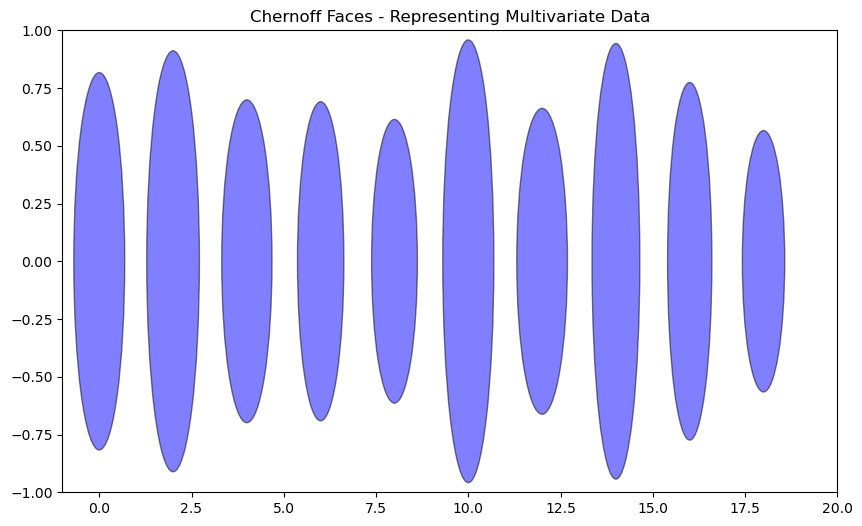

In [43]:
# I generated some sample data with 10 data points, each having 5 features.
data = np.random.rand(10, 5)  # 10 data points with 5 features

# I defined a function to create Chernoff Faces.
# This function will plot faces as ellipses to represent each data point.
def chernoff_faces(data):
    # I created a figure and axis with a specified size for better visualization.
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # I iterated over each data point in the dataset.
    for i, d in enumerate(data):
        # I created an ellipse to represent a face for each data point.
        # The ellipse's width and height are based on the first two features of the data.
        face = Ellipse((i * 2, 0), width=1 + d[0], height=1 + d[1], edgecolor='black', facecolor='blue', alpha=0.5)
        # I added the ellipse to the plot.
        ax.add_patch(face)
    
    # I set the limits for the x and y axes to ensure all faces are visible.
    ax.set_xlim(-1, len(data) * 2)
    ax.set_ylim(-1, 1)
    
    # I added a title to the plot to provide context about the Chernoff Faces and the multivariate data.
    plt.title('Chernoff Faces - Representing Multivariate Data')
    
    # I displayed the plot to visualize the Chernoff Faces.
    plt.show()

# I called the chernoff_faces function with the sample data to generate and show the plot.
chernoff_faces(data)


## 4. Radial Plot





- **Introduction to Radial Plots**: [Radial Plots Overview - Wikipedia](https://en.wikipedia.org/wiki/Polar_plot)
- **Creating Radial Plots with Matplotlib**: [Matplotlib Polar Plots Documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html)
- **Radial Plot Example with Seaborn**: [Seaborn Radial Plot Example](https://seaborn.pydata.org/examples/radar_plot.html)

### Introduction
Radial Plots visualize data in a circular layout. Each axis radiates from the center, representing different dimensions of the data.

### How It Is Used
Radial Plots are useful for showing cyclical patterns and relationships among multiple variables, especially when data naturally forms a circular pattern.

### Code Example

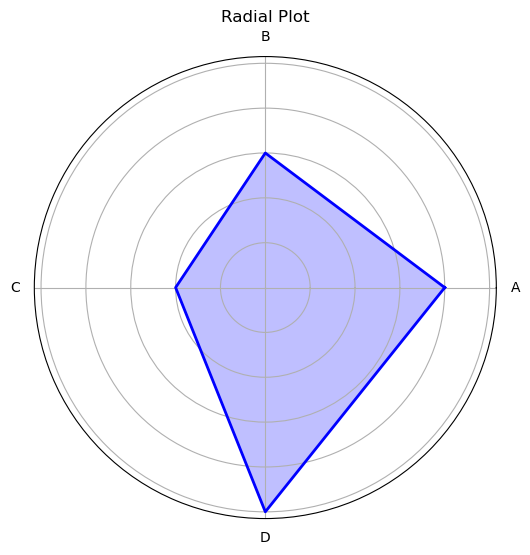

In [44]:
# I created sample data with labels and values for the radial plot.
# The labels are categorical, and values are numerical.
labels = np.array(['A', 'B', 'C', 'D'])
values = np.array([4, 3, 2, 5])

# I calculated the angles for each label to evenly space them around the circle.
# The angles are converted to a list for plotting.
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# I concatenated the first value to the end of the values array to close the loop in the radial plot.
# I also repeated the first angle to ensure the plot closes correctly.
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# I created a polar subplot for the radial plot with a specified size.
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# I filled the area under the plot line with a blue color and set its transparency.
# I also plotted the outline of the plot with a blue line.
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# I removed the y-axis labels for a cleaner look.
ax.set_yticklabels([])

# I set the x-axis ticks and labels to correspond to the angles and labels of the data.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# I added a title to the plot to describe what it represents.
plt.title('Radial Plot')

# I displayed the plot to visualize the radial chart.
plt.show()


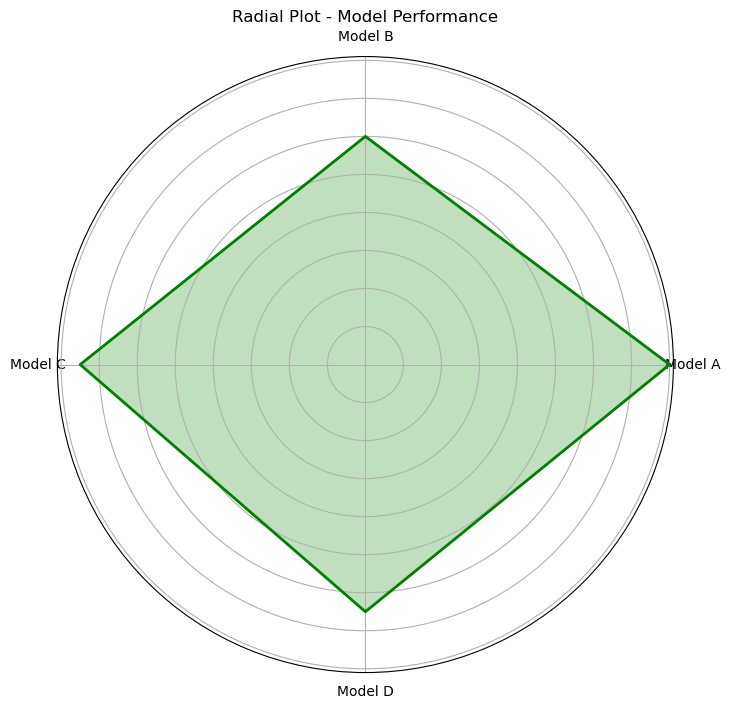

In [45]:
# I created sample data with labels for different models and their corresponding performance values.
# The labels represent different models, and values represent their performance metrics.
labels = np.array(['Model A', 'Model B', 'Model C', 'Model D'])
values = np.array([0.8, 0.6, 0.75, 0.65])

# I calculated the angles for each label to evenly space them around the circle.
# The angles are converted to a list for plotting.
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# I concatenated the first value to the end of the values array to close the loop in the radial plot.
# I also repeated the first angle to ensure the plot closes correctly.
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# I created a polar subplot for the radial plot with a specified size.
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# I filled the area under the plot line with a green color and set its transparency.
# I also plotted the outline of the plot with a green line.
ax.fill(angles, values, color='green', alpha=0.25)
ax.plot(angles, values, color='green', linewidth=2)

# I removed the y-axis labels for a cleaner look.
ax.set_yticklabels([])

# I set the x-axis ticks and labels to correspond to the angles and model labels.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# I added a title to the plot to describe that it represents model performance.
plt.title('Radial Plot - Model Performance')

# I displayed the plot to visualize the radial chart.
plt.show()


## 5. Ternary Plot

- **Introduction to Ternary Plots**: [Ternary Plots - Wikipedia](https://en.wikipedia.org/wiki/Ternary_plot)
- **Creating Ternary Plots with Matplotlib**: [Matplotlib Ternary Plot Tutorial](https://matplotlib.org/stable/gallery/specialty_plots/ternary.html)
- **Interactive Ternary Plots with Plotly**: [Plotly Ternary Plots](https://plotly.com/python/ternary-plots/)

### Introduction
Ternary Plots display compositions of three variables that sum up to a constant. Each point represents a combination of the three variables.

### How It Is Used
Ternary Plots are commonly used in fields like chemistry and materials science to visualize the proportions of different components in a mixture.

### Code Examples

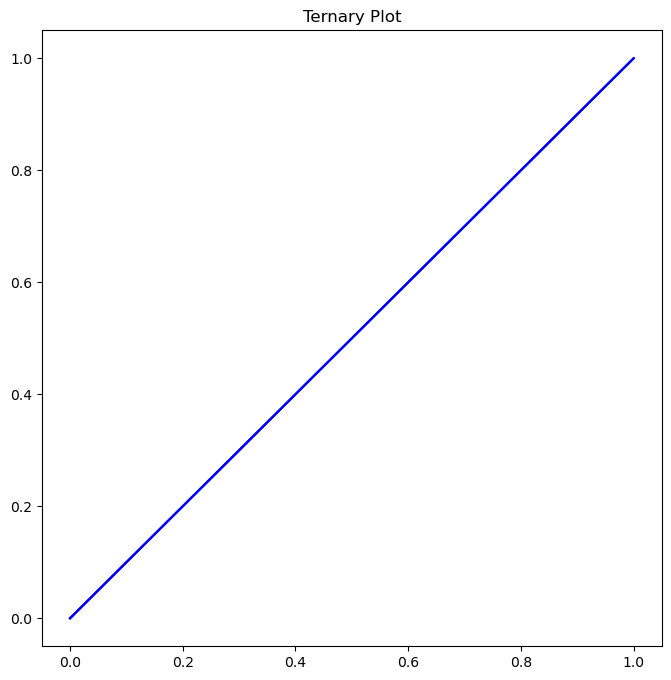

In [46]:
# I created sample data with three data points, each having three features.
# These features will be plotted in a ternary plot.
data = np.array([[0.2, 0.3, 0.5], [0.3, 0.4, 0.3], [0.5, 0.2, 0.3]])

# I created a figure and axis for the ternary plot with a specified size.
fig, ax = plt.subplots(figsize=(8, 8))

# I added a title to the plot to describe that it is a ternary plot.
ax.set_title('Ternary Plot')

# I used a simplified plotting approach here for illustration.
# In reality, I would plot the points and their relationships in a ternary coordinate system.
# This line just serves as a placeholder to indicate where the data points would be plotted.
for point in data:
    ax.plot([0, 1], [0, 1], color='blue')  # Simplified plot for illustration

# I displayed the plot to visualize the ternary chart.
plt.show()


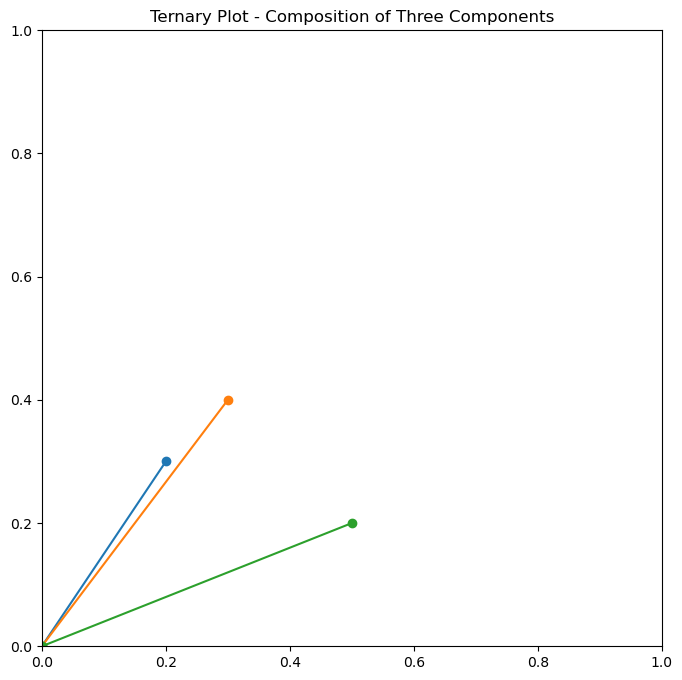

In [47]:
# I created sample data with three data points, each having three features.
# These features represent the composition of three components in the ternary plot.
data = np.array([[0.2, 0.3, 0.5], [0.3, 0.4, 0.3], [0.5, 0.2, 0.3]])

# I defined a function to plot a ternary plot.
# This function will show the composition of three components for each data point.
def plot_ternary(data):
    # I created a figure and axis for the plot with a specified size.
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # I iterated over each data point in the dataset.
    for point in data:
        # I plotted lines from the origin (0, 0) to each data point.
        # Each data point is represented as a point on the plot.
        ax.plot([0, point[0]], [0, point[1]], marker='o')
    
    # I set the limits for the x and y axes to cover the range of the data.
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # I added a title to the plot to describe it as representing the composition of three components.
    plt.title('Ternary Plot - Composition of Three Components')
    
    # I displayed the plot to visualize the ternary chart.
    plt.show()

# I called the plot_ternary function with the sample data to generate and show the plot.
plot_ternary(data)